<a href="https://colab.research.google.com/github/Anastasiamay/Study_projects/blob/main/a_b_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Проект: Принятие решений в бизнесе

# Описание проекта
Для анализа, отделом марктинга предоставлен датасет со списком подготовленных гипотез для повышения выручки интернет-магазина. Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать его результат

**Цель:** Провести анализ A/B-тестирования по приоритизированным гипотезам, обосновать принятое решение по результатам теста

**Краткий план исследования**:
* Изучить общую информацию и подготовить данные для дальнейшего исследования
* Провести приоритизацию гипотез
* Проанализировать результаты A/B-тестирования

### Загрузка данных и подготовка их к анализу

In [152]:
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
from matplotlib import pyplot as plt

In [153]:
!gdown --id 1Ltsvfi5iU9-CRy2zMYiYXT5r1MqBtQmm
!gdown --id 1TDmcyCx9Nz6K73zD-mgrC7iwk5QYqyw4
!gdown --id 1ouvKwFdh47QFN9YI5G_qe8eGI0kSu2DE

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1Ltsvfi5iU9-CRy2zMYiYXT5r1MqBtQmm
To: /content/visitors.csv
100% 1.14k/1.14k [00:00<00:00, 2.09MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1TDmcyCx9Nz6K73zD-mgrC7iwk5QYqyw4
To: /content/orders.csv
100% 48.5k/48.5k [00:00<00:00, 56.4MB/s]
/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id

In [154]:
hypothesis, order, visitors = (
    pd.read_csv('hypothesis.csv'), 
    pd.read_csv('orders.csv'), 
    pd.read_csv('visitors.csv')
)

In [155]:
def data_info(name_data):
    display(name_data.head())
    display(name_data.info())
    print(f'Количество дубликатов:{name_data.duplicated().sum()}')
    print(f'Количество пропусков: \n{name_data.isna().sum()}')

In [156]:
data_info(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

Количество дубликатов:0
Количество пропусков: 
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64


Описание данных
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

In [157]:
data_info(order)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

Количество дубликатов:0
Количество пропусков: 
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64


Описание данных
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

In [158]:
data_info(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

Количество дубликатов:0
Количество пропусков: 
date        0
group       0
visitors    0
dtype: int64


Описание данных
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Приведем названия колонок к удобному написанию, изменим тип данных у колонок с датами. Видим, что гипотезы отображаются не полностью, снимим ограничение на отображение максимального количества знаков в строках

In [159]:
pd.set_option('display.max_colwidth', None)
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [160]:
hypothesis.columns = hypothesis.columns.str.lower()
hypothesis.columns

Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [161]:
order = order.rename(columns={'transactionId': 'transaction_id', 'visitorId': 'visitor_id'})
order.columns

Index(['transaction_id', 'visitor_id', 'date', 'revenue', 'group'], dtype='object')

In [162]:
order['date'] = pd.to_datetime(order['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

Изучив датасеты, увидели, что дубликатов и пропусков в данных нет. В ходе предобработки установили настройки для полного отображения названия гипотез, даты привели к нужному типу данных, изменили названия колонок

### Приоритизация гипотез

Для приоритизации гипотез воспользуемся фреймворками ICE и RICE. Расчет методом ICE учитывыет парметры влияние, уверенность в влиянии, усилия / простота. А метод RICE, помимо тех же парметров, включает количество пользователей, которых затронет вносимое изменение

In [163]:
hypothesis['ICE'] = round(hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.0


In [164]:
hypothesis['RICE'] = round(hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts'])
hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


Видим, что при применении RICE вместо ICE, лидирующую позицию стала занимать гипотеза на третьем месте по методу ICE. Так произошло из-за коэффициента reach, который для гипотезы "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок" оценили в 10 баллов, то есть в этой гипотезе будет максимальный охват пользователей, которых затронет изменение

### Анализ A/B-тестирования

Определим сколько групп в тесте, количество пользователей в тесте, временной промежуток проведения теста

In [165]:
order['group'].unique()

array(['B', 'A'], dtype=object)

In [166]:
print(min(order['date']))
print(max(order['date']))

2019-08-01 00:00:00
2019-08-31 00:00:00


In [167]:
order['group'].value_counts()

B    640
A    557
Name: group, dtype: int64

В тесте две группы, количество пользователей в них не сбалансировано, тест проводился 1 месяц с 1 по 31 августа 2019 года

Определим количество пользователей, которые участвовали в обеих группах теста

In [168]:
pivot = pd.pivot_table(order, index='visitor_id', columns='group', values='transaction_id', aggfunc='count')

both_groups = pivot[(pivot['A'] > 0) & (pivot['B'] > 0)]

if len(both_groups) > 0:
    print(f'Найдено {both_groups.shape[0]} пользователей, которые участвовали в обеих группах теста')
else:
    print('Пользователи, участвовавшие в обеих группах теста, не найдены.')

Найдено 58 пользователей, которые участвовали в обеих группах теста


In [169]:
print('''Относительные потери при удалении пользоватлей, участвовавших в обеих группах составят: {0:.2%}'''\
      .format(both_groups.shape[0] / order['visitor_id'].nunique()))

Относительные потери при удалении пользоватлей, участвовавших в обеих группах составят: 5.63%


Пользователей, которые участвовали в обеих группах теста лучше исключить из анализа, такие пользователи могут повлиять на результаты принятия решения о том, какая группа в тесте показала себя лучше, так как мы не сможем однозначно сказать, повлияло ли на такого пользователя введенное изменение

In [170]:
orders = order[~order['visitor_id'].isin(both_groups.index)]

Соберём агрегированные кумулятивные по дням данные о заказах, о посетителях интернет-магазина 

In [171]:
# уникальные пары значений дат и групп
group_date = orders[['date', 'group']].drop_duplicates()

# агрегированные кумулятивные по дням данные о заказах
agg_orders = group_date.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                       .agg({'date': 'max', 'group': 'max', 'visitor_id': 'nunique', 'transaction_id': 'nunique',
                             'revenue': 'sum'}), axis=1).sort_values(by=['date', 'group'])

# агрегированные кумулятивные по дням данные о посетителях интернет-магазина 
agg_visitors = group_date.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], 
                                                                  visitors['group'] == x['group'])]\
                         .agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}), axis=1).sort_values(by=['date', 'group'])

# объединим данные, дадим столбцам названия
cum_data = agg_orders.merge(agg_visitors, left_on = ['date', 'group'], right_on = ['date', 'group'])
cum_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cum_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,19,23,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,36,42,234381,1338
3,2019-08-02,B,39,40,221801,1294
4,2019-08-03,A,60,66,346854,1845


Построим график кумулятивной выручки по группам

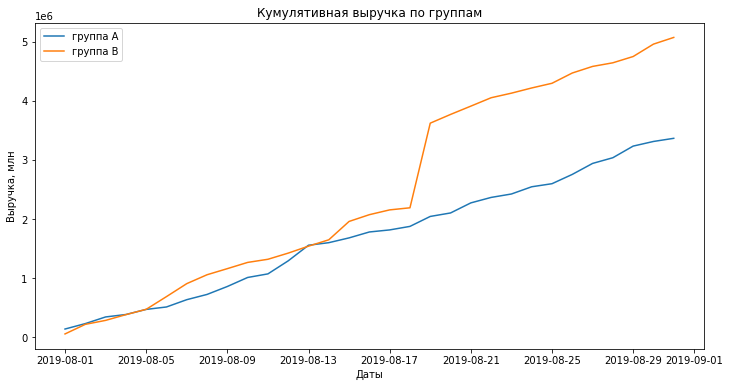

In [173]:
a_cum_revenue = cum_data[cum_data['group'] == 'A'][['date', 'revenue', 'orders']]
b_cum_revenue = cum_data[cum_data['group'] == 'B'][['date', 'revenue', 'orders']]

plt.figure(figsize=(12,6))
plt.plot(a_cum_revenue['date'], a_cum_revenue['revenue'], label='группа A')
plt.plot(b_cum_revenue['date'], b_cum_revenue['revenue'], label='группа B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Даты')
plt.ylabel('Выручка, млн')

plt.legend();

Выручка растет на протяжении всего теста в обеих группах, но в группе А она меньше. В группе В наблюдается резкий скачок после 17 августа, это может означать либо очень дорогие заказы, либо о резком увеличении числа заказов

Построим график среднего чека по группам

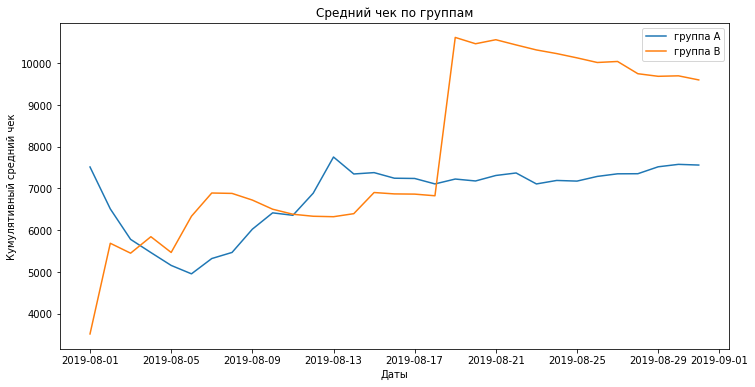

In [175]:
plt.figure(figsize=(12,6))
plt.plot(a_cum_revenue['date'], a_cum_revenue['revenue']/a_cum_revenue['orders'], label='группа A')
plt.plot(b_cum_revenue['date'], b_cum_revenue['revenue']/b_cum_revenue['orders'], label='группа B')
plt.title('Средний чек по группам')
plt.xlabel('Даты')
plt.ylabel('Кумулятивный средний чек')
plt.legend();

В группе В также наблюдается скачок в той же дате, скорее всего здесь произошли крупные покупки. Средний чек для группы А к концу теста стабилизировался

Построим график относительного различия для среднего чека

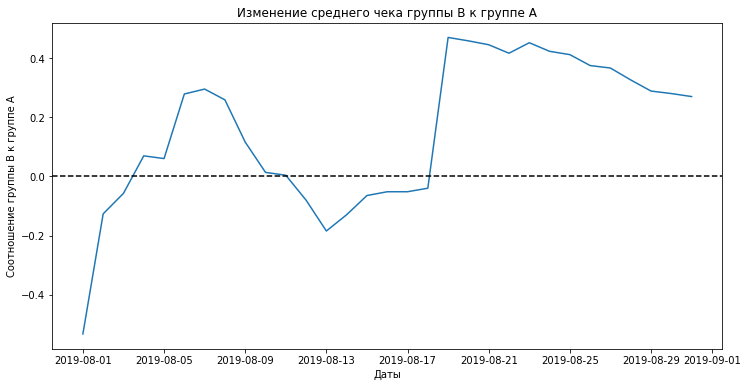

In [176]:
cum_revenue = a_cum_revenue.merge(b_cum_revenue, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
plt.figure(figsize=(12,6))
plt.plot(cum_revenue['date'], (cum_revenue['revenue_b']/cum_revenue['orders_b']) / 
         (cum_revenue['revenue_a']/cum_revenue['orders_a']) - 1)
plt.title('Изменение среднего чека группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Соотношение группы В к группе А')
plt.axhline(y=0, color='black', linestyle='--');

На графике имееются скачки, необходимо проанализировать на наличие крупных заказов и выбросов

Построим график среднего количества заказов на посетителя по группам

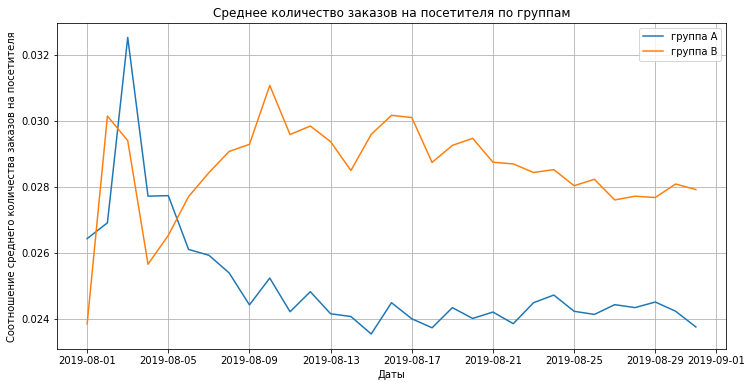

In [177]:
cum_data['conversion'] = cum_data['orders']/cum_data['visitors']
a_cum_data = cum_data[cum_data['group'] == 'A']
b_cum_data = cum_data[cum_data['group'] == 'B']

plt.figure(figsize=(12,6))
plt.plot(a_cum_data['date'], a_cum_data['conversion'], label='группа A')
plt.plot(b_cum_data['date'], b_cum_data['conversion'], label='группа B')
plt.title('Среднее количество заказов на посетителя по группам')
plt.xlabel('Даты')
plt.ylabel('Соотношение среднего количества заказов на посетителя')
plt.grid(True)
plt.legend();

Среднее количество заказов на посетителя группы В значительно выше и к концу тестирования имеет небольшое колебание

Построим график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

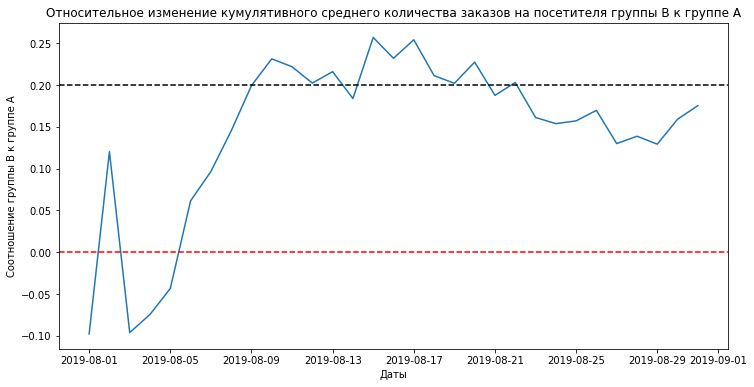

In [178]:
cum_conversions = a_cum_data[['date', 'conversion']].merge(b_cum_data[['date', 'conversion']], 
                                                           left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])
plt.figure(figsize=(12,6))
plt.plot(cum_conversions['date'], cum_conversions['conversion_b']/cum_conversions['conversion_a'] - 1)
plt.title('Относительное изменение кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Даты')
plt.ylabel('Соотношение группы В к группе А')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.2, color='black', linestyle='--');

В группе В наблюдается прирост среднего количества заказов на посетителя, но примерно в 20 числах августа количество заказов на посетителя начало снижаться, а концу теста опять начало расти. Нужно рассмотреть аномалии

Посмотрим количество заказов по пользователям

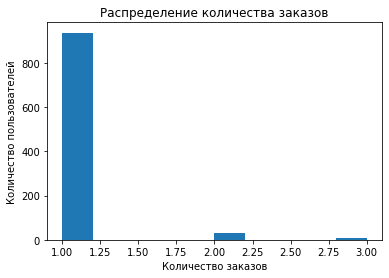

In [179]:
orders_users = orders.groupby('visitor_id', as_index=False).agg({'transaction_id': 'nunique'})
orders_users.columns = ['user_id', 'orders']
plt.hist(orders_users['orders'])
plt.title('Распределение количества заказов')
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей');

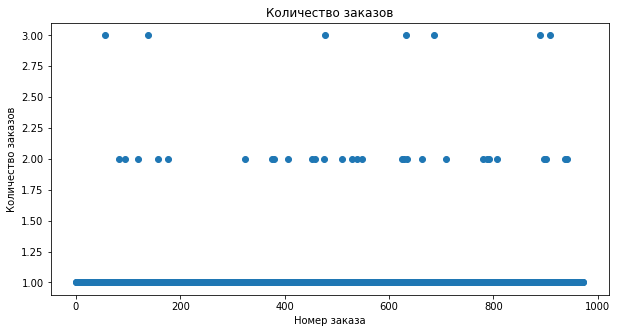

In [180]:
x = pd.Series(range(0,len(orders_users)))
plt.figure(figsize=(10,5))
plt.scatter(x, orders_users['orders'])
plt.title('Количество заказов')
plt.xlabel('Номер заказа')
plt.ylabel('Количество заказов'); 

Пользователей, совершивших больше двух заказов достаточно мало. Рассчитаем 95 и 99 перцентили и определим границу аномальных пользователей

In [181]:
np.percentile(orders_users['orders'], [95, 99])

array([1., 2.])

Не более 5% пользователей совершили больше 1 заказов. И не более 1% совершили болеше 2 заказов. Пользователей, совершивших более  2 заказов будем считать аномальными

Построим график стоимостей заказов

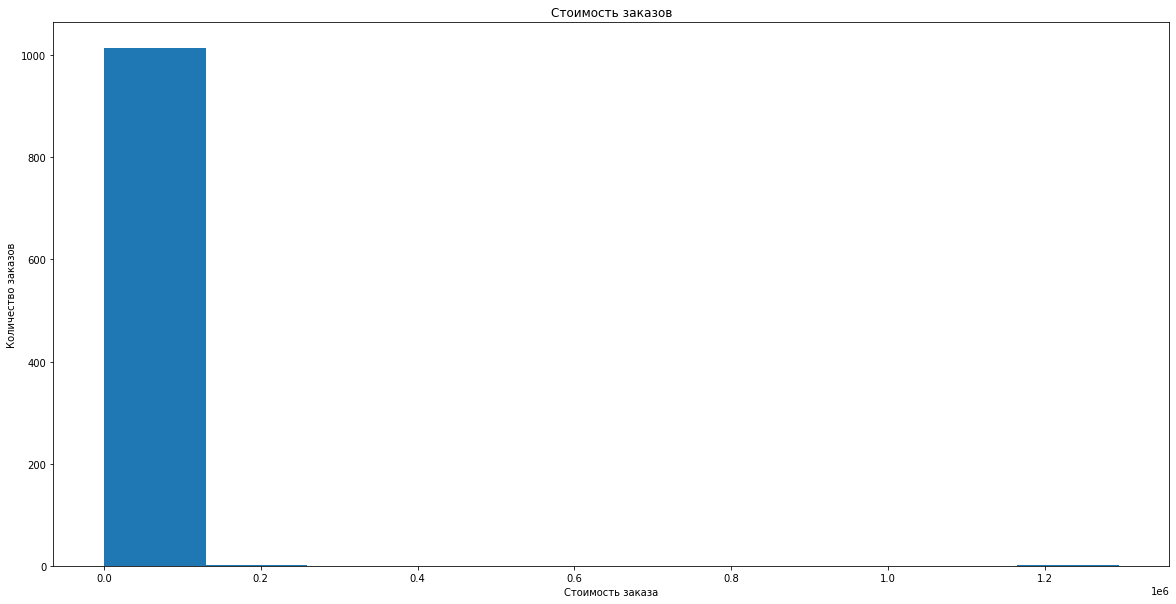

In [182]:
plt.figure(figsize=(20,10))
plt.hist(orders['revenue'])
plt.title('Стоимость заказов')
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество заказов');

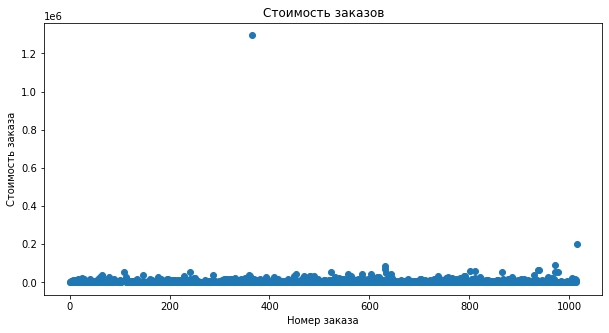

In [183]:
x = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.scatter(x, orders['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Номер заказа')
plt.ylabel('Стоимость заказа'); 

По графику точно видны 2 выброса: заказ на сумму около 200 тысяч и заказ на сумму более 1.2 млн, которые и повлияли на графики кумулятивных метрик. Ограничим график, и посмотрим распределение без явных выбросов

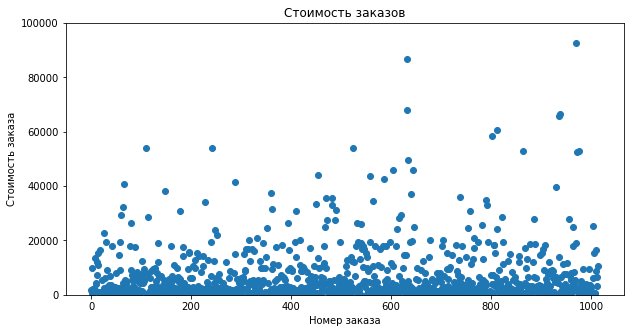

In [184]:
x = pd.Series(range(0,len(orders['revenue'])))
plt.figure(figsize=(10,5))
plt.ylim(0, 100000)
plt.scatter(x, orders['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Номер заказа')
plt.ylabel('Стоимость заказа'); 

Видно, что заказов, дороже 60000 остаточно мало. Рассчитаем 95 и 99 перцентили, чтобы определить границу аномальных заказов

In [185]:
np.percentile(orders['revenue'], [95, 99])

array([26785., 53904.])

За аномальные заказы примем заказы стоимостью более 53904

Подготовим данные для определения статистической значимости различий между группами

In [186]:
# для пользователей, совершивших хотя бы один заказ укажем количество заказов
a_orders_users = orders[orders['group'] == 'A'].groupby('visitor_id', as_index=False)\
                                               .agg({'transaction_id': pd.Series.nunique})
a_orders_users.columns = ['user_id', 'orders']

b_orders_users = orders[orders['group'] == 'B'].groupby('visitor_id', as_index=False)\
                                               .agg({'transaction_id': pd.Series.nunique})
b_orders_users.columns = ['user_id', 'orders']

# добавим нули для пользователей, которые ничего не заказали
a_sample = pd.concat([a_orders_users['orders'],\
                    pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(a_orders_users['orders'])),\
                              name='orders')],axis=0)

b_sample = pd.concat([b_orders_users['orders'],\
                    pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(b_orders_users['orders'])),\
                              name='orders')],axis=0)

В наших данных есть выбросы, а значит распределение будет не нормальным, поэтому будем использовать непараметрический тест Уилкоксона-Манна-Уитни. 

Сформулируем гипотезы:
* Нулевая: различий между группами нет. 
* Альтернативная: различия между группами есть.

In [187]:
def test_mnw(a , b):
    alpha = .05
    pvalue = stats.mannwhitneyu(a, b)[1]
    print(f'pvalue = {round(pvalue, 3)}')
    print('Прирост группы В составляет: {0:.2%}'.format(b.mean() / a.mean() - 1))
    if pvalue < alpha:
        print('Отвергаем нулевую гипотезу, различия между группами есть')
    else:
        print('Нет оснований отвергнуть нулевую гипотезу, различий между группами нет')

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Сформулируем гипотезы:
* Нулевая: различий в среднем количестве заказов на посетителя между группами по «сырым» данным нет. 
* Альтернативная: различия в среднем количестве заказов на посетителя между группами по «сырым» данным есть.

In [188]:
test_mnw(a_sample, b_sample)

pvalue = 0.011
Прирост группы В составляет: 15.98%
Отвергаем нулевую гипотезу, различия между группами есть


При анализе сырых данных тест Уилкоксона-Манна-Уитни показал, что есть различия в среднем числе заказов между группами, а относительный прирост среднего количества заказов группы В к А почти 16%

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным
Сформулируем гипотезы:
* Нулевая: различий в среднем чеке заказа между группами по «сырым» данным нет. 
* Альтернативная: различия в среднем чеке заказа между группами по «сырым» данным есть.

In [189]:
test_mnw(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])

pvalue = 0.829
Прирост группы В составляет: 28.66%
Нет оснований отвергнуть нулевую гипотезу, различий между группами нет


При анализе сырых данных тест Уилкоксона-Манна-Уитни показал, что статистически значимых различий в среднем чеке заказа между группами нет, но при этом средний чек группы В значительно больше группы А

Подготовим очищенные данные

In [190]:
# определим количество аномальных пользователей, у которых количество и сумма заказа превышает 99 перцентиль
many_orders = pd.concat([a_orders_users[a_orders_users['orders'] > np.percentile(orders_users['orders'], 99)]['user_id'],\
                         b_orders_users[b_orders_users['orders'] > np.percentile(orders_users['orders'], 99)]['user_id']],\
                        axis=0)
exp_orders = orders[orders['revenue'] > np.percentile(orders['revenue'], 99)]['visitor_id']
anomal_users = (pd.concat([many_orders, exp_orders], axis=0).drop_duplicates().sort_values())

anomal_users.shape[0]

16

In [191]:
print('''Относительные потери при фильтрации аномальных пользователей составят: {0:.2%}'''\
      .format(anomal_users.shape[0] / order['visitor_id'].nunique()))

Относительные потери при фильтрации аномальных пользователей составят: 1.55%


Теперь отфильтруем аномалных пользователей, которые составили всего около 1.5%

In [192]:
filtr_sample_a = pd.concat([a_orders_users[np.logical_not(a_orders_users['user_id'].isin(anomal_users))]['orders'],\
                 pd.Series(0, index=np.arange(visitors[visitors['group'] == 'A']['visitors'].sum() - len(a_orders_users['orders'])),\
                                              name='orders')], axis=0)

filtr_sample_b = pd.concat([b_orders_users[np.logical_not(b_orders_users['user_id'].isin(anomal_users))]['orders'],\
                 pd.Series(0, index=np.arange(visitors[visitors['group'] == 'B']['visitors'].sum() - len(b_orders_users['orders'])),\
                                              name='orders')], axis=0) 

Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным
Сформулируем гипотезы:
* Нулевая: различий в среднем количестве заказов на посетителя между группами по «очищенным» данным нет. 
* Альтернативная: различия в среднем количестве заказов на посетителя между группами по «очищенным» данным есть.

In [193]:
test_mnw(filtr_sample_a, filtr_sample_b)

pvalue = 0.007
Прирост группы В составляет: 18.92%
Отвергаем нулевую гипотезу, различия между группами есть


При анализе очищенных данных относительный прирост среднего количества заказов группы В к А увеличился, и различия между группами, по-прежнему, есть

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным
Сформулируем гипотезы:
* Нулевая: различий в среднем чеке заказа между группами по «очищенным» данным нет. 
* Альтернативная: различия в среднем чеке заказа между группами по «очищенным» данным есть.

In [194]:
test_mnw(orders[np.logical_and(orders['group'] == 'A', \
                               np.logical_not(orders['visitor_id'].isin(anomal_users)))]['revenue'],\
         orders[np.logical_and(orders['group'] == 'B', \
                               np.logical_not(orders['visitor_id'].isin(anomal_users)))]['revenue'])

pvalue = 0.788
Прирост группы В составляет: -3.23%
Нет оснований отвергнуть нулевую гипотезу, различий между группами нет


Также как и при анализе "сырых" данных, на очищенных, тест показал, что статистических отличий между группами в среднем чеке заказа нет. При этом, когда исключили аномальных пользоватлей, оказалось, что разницы в среднем чеке почти нет

В ходе анализа выявили, что:
* по среднему чеку статистических различий между группами нет, как по "сырым", так и по "очищенным" данным;
* по среднему количеству заказов имеются статистические различия между группами и по "сырым" и по "очищенным" данным;
* относительный прирост среднего количества заказов по "сырым" данным группы В к А составил около 16% и 19% по "очищенным" данным.

На основании полученных результатов рекомендуется остановить тест и признать успех группы В

### Выводы
В ходе работы изучили предоставленные датасеты и подготовили их дальнейшему анализу. Дубликатов и пропущенных значений в данных не обнаружили. 

На этапе приоритизации гипотез воспользовались двумя методами ICE, и его модификацией RICE, учитывающий количество пользователей, которых затронет вносимое изменение. Применяя метод RICE, наибольшее количество баллов набрала гипотеза "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

При анализе А/В-тестирования:
* установили, что тест проводился на двух группах, с 1 по 31 августа 2019;
* в целях получения более достоверных результатов, исключили из анализа пользователей, участвовавших в обеих группах, они составили 5.6 % данных
* график изменения среднего чека группы А к группе В не показал стабильности;
* график относительного прироста конверсии имеет незначительные колебания;
* были выявлены выбросы, которые оказывали влияние на графики, они составили 1.5 % данных.

Для определения статистической значимости различий между группами применили непараметрический тест Уилкоксона-Манна-Уитни. Получились следующие результаты:
* по среднему чеку статистических различий между группами нет, как по "сырым", так и по "очищенным" данным;
* по среднему количеству заказов имеются статистические различия между группами и по "сырым" и по "очищенным" данным;
* относительный прирост среднего количества заказов по "сырым" данным группы В к А составил 16% и 19% по "очищенным" данным.

Несмотря на отсутствие статистических различий между группами по среднему чеку, имеются статистически значимые различия между группами по среднему количеству заказов, и относительное увеличение среднего количества заказов группы В к группе А достаточно велико. Поэтому, рекомендуется остановить тест и сделать вывод, что успех за группой В, у нее более высокая конверсия по среднему количеству заказов.